In [92]:
import pandas as pd
import numpy as np
import scanpy as sc
import random

In [2]:
adata = sc.read_10x_mtx(
    '/home/thomas/Documents/Projects/plascenta/data/pbmc_adata',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)  

In [3]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]


adata.raw = adata

/home/thomas/Documents/Environments/plascenta/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [5]:

sc.pp.scale(adata, max_value=10)

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [6]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [7]:
sc.tl.umap(adata)

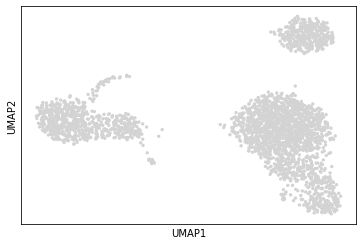

In [8]:
sc.pl.umap(adata)

In [9]:
sc.tl.leiden(adata)

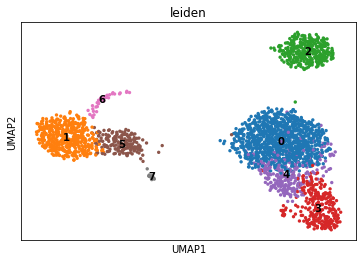

In [10]:
sc.pl.umap(adata, color="leiden", legend_loc = "on data")

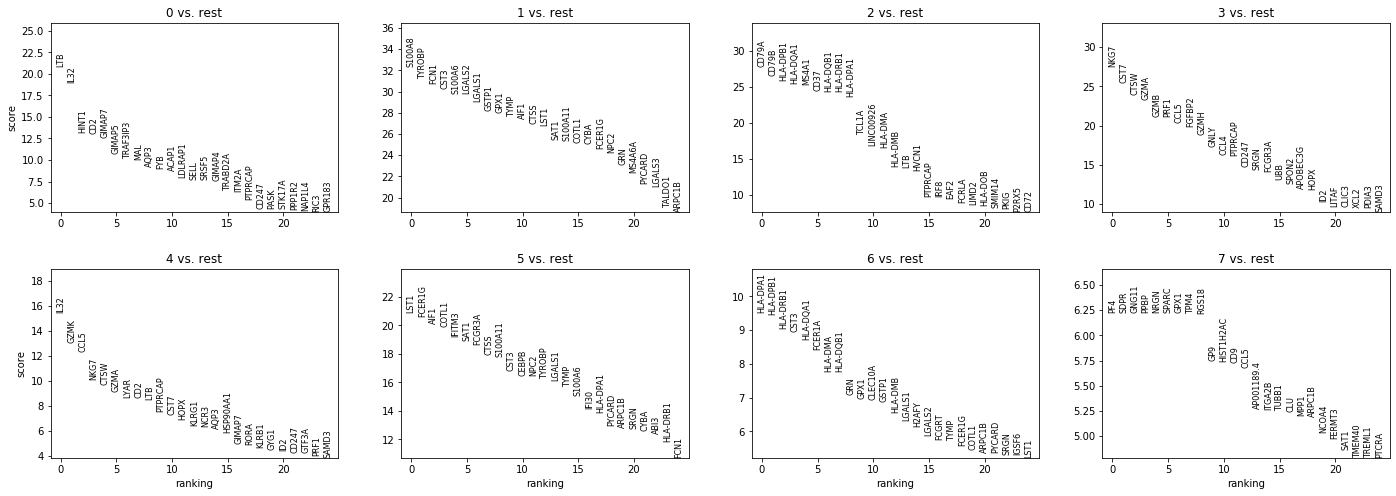

In [11]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [12]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(5)

0       1         2     3     4       5         6      7
0     LTB  S100A8     CD79A  NKG7  IL32    LST1  HLA-DPA1    PF4
1    IL32  TYROBP     CD79B  CST7  GZMK  FCER1G  HLA-DPB1   SDPR
2   HINT1    FCN1  HLA-DPB1  CTSW  CCL5    AIF1  HLA-DRB1  GNG11
3     CD2    CST3  HLA-DQA1  GZMA  NKG7   COTL1      CST3   PPBP
4  GIMAP7  S100A6     MS4A1  GZMB  CTSW  IFITM3  HLA-DQA1   NRGN

In [15]:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.obs['clusters'] = adata.obs['leiden'].copy()
adata.obs['annotated_clusters'] = adata.obs['leiden'].copy()
adata.rename_categories('annotated_clusters', new_cluster_names)


In [135]:
adata.obs['y_auto_ratio'] = [random.uniform(0, 0.1) for i in range(len(adata.obs))]
r_arr = np.array(['fetal']*len(adata.obs) + ['origin']*len(adata.obs))
np.random.shuffle(r_arr)
adata.obs['fetal_maternal_origin'] = r_arr[:len(adata.obs)]

In [136]:
def save_adata_for_dash(adata, file_name):
    obs_df = adata.obs[['clusters', 'annotated_clusters', 'fetal_maternal_origin']].reset_index()
    obs_df = obs_df.rename(columns = {'index':'cell_names'})
    umap_df = pd.DataFrame(adata.obsm['X_umap'], columns =['umap_1', 'umap_2'])
    
    save_df = pd.concat([obs_df, umap_df], axis=1)
    save_df.to_csv(file_name)
    return save_df

In [91]:
s_df = save_adata_for_dash(adata, '/home/thomas/Documents/Projects/plascenta/data/pbmc_adata/clusters.csv')

NameError: name 'save_adata_for_dash' is not defined

In [90]:
s_df

NameError: name 's_df' is not defined

In [96]:
hv.extension('plotly')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [97]:
df = pd.read_csv('/home/thomas/Documents/Projects/plascenta/data/pbmc_adata/clusters.csv')
dataset = hv.Dataset(df)

In [106]:
cmap_list= ['blue', 'orange', 'red', 'yellow', 'green', 'purple', 'black', 'pink']
clusters = df.annotated_clusters.unique()
cmap_dict = {}
for group, color in zip(clusters, cmap_list):
    cmap_dict[group] = color

In [117]:
cmap_dict = {
    'NK': 'blue',
     'B': 'orange',
     'CD4 T': 'red',
     'CD14 Monocytes': 'yellow',
     'CD8 T': 'green',
     'FCGR3A Monocytes': 'purple',
     'Dendritic': 'black',
     'Megakaryocytes': 'pink'
}

hv.Scatter(
    dataset, 
    kdims=['umap_1'], 
    vdims=['umap_2', 'annotated_clusters']
).opts(color=hv.dim('annotated_clusters').categorize(cmap_dict))


:Scatter   [umap_1]   (umap_2,annotated_clusters)

In [124]:
from holoviews.operation.element import histogram
histogram(dataset, dimension='y_auto_ratio').redim(Count=hv.Dimension('Count', soft_range=(0, 10)))

:Histogram   [y_auto_ratio]   (Count)

In [126]:
hv.Bars(dataset, hv.Dimension('annotated_clusters'), 'Count')

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Frequency']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
sc_df = pd.read_csv('../data/pbmc_adata/clusters.csv')
cmap_dict = {
    'NK': 'blue',
     'B': 'orange',
     'CD4 T': 'red',
     'CD14 Monocytes': 'yellow',
     'CD8 T': 'green',
     'FCGR3A Monocytes': 'purple',
     'Dendritic': 'black',
     'Megakaryocytes': 'pink'
}
sc_df['cluster_color'] = list(map(cmap_dict.get, sc_df.annotated_clusters.to_list()))

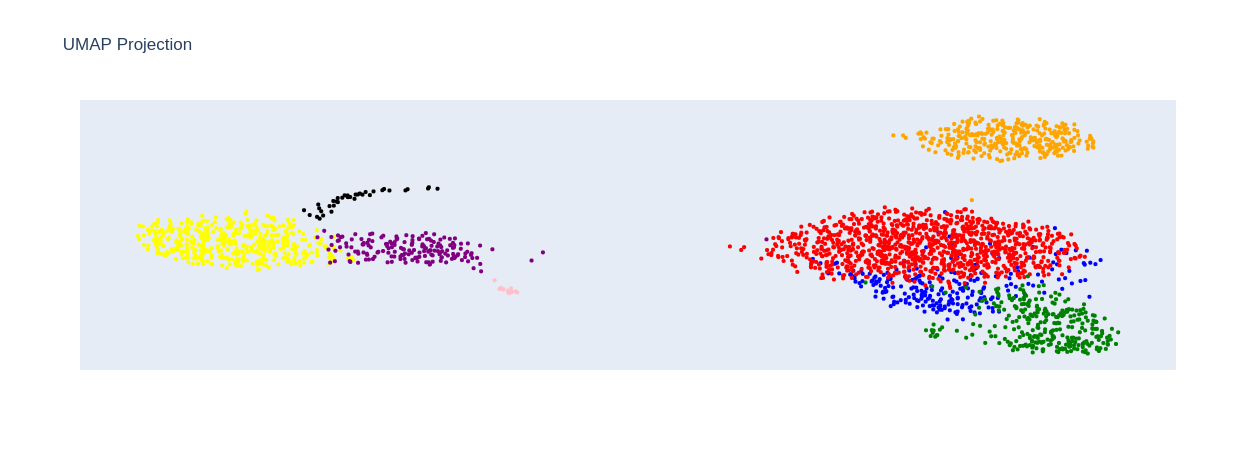

In [89]:
umap_layout = go.Layout(
    title='UMAP Projection',
    autosize=True,
    xaxis=go.layout.XAxis(
        automargin = False, 
        side='top',
        title = dict(
            text = 'UMAP1'
        ),
        showgrid=False, 
        zeroline=False,
        showticklabels=False,
        showspikes = False,
    ),
    yaxis=go.layout.YAxis(
        automargin = False, 
        side = 'left', 
        title = dict(
            text = 'UMAP2'
        ),
        showgrid=False, 
        zeroline=False,
        showticklabels=False,
        showspikes = False
    )
)
umap_figure = 
for group in set(sc_df.annotated_clusters):
    r_sc_df = sc_df[sc_df.annotated_clusters == group]
    umap_figure.add_trace(
        go.Scatter(
            x = r_sc_df.umap_1.to_list(),
            y = r_sc_df.umap_2.to_list(),
            mode='markers',
            marker = dict(
                color = cmap_dict[group],
                size = 4
            ),
            name=group,
            legendgroup = group,
            showlegend = False
        ),
        row=1,
        col=1
    )
    umap_figure.add_trace(
        go.Bar(
            x = [group],
            y = [len(r_sc_df)],
            name=group,
            legendgroup = group,
            marker = dict(
                color = cmap_dict[group]
            ),
        ),
        row=1,
        col=2
    )
umap_figure.layout['xaxis']['title'] = 'UMAP1'
umap_figure.layout['yaxis']['title'] = 'UMAP2'
for axis in ['xaxis', 'yaxis']:
    umap_figure.layout[axis]['showgrid'] = False
    umap_figure.layout[axis]['zeroline'] = False
    umap_figure.layout[axis]['showticklabels'] = False
    umap_figure.layout[axis]['showspikes'] = False

umap_figure.layout['xaxis2']['title'] = 'Cell Type'
umap_figure.layout['yaxis2']['title'] = 'Number of Cells'


umap_figure.show()

In [ ]:
umap_figure.layout['xaxis'] =go.layout.XAxis(
        automargin = False, 
        side='bottom',
        title = dict(
            text = 'UMAP1'
        ),
        showgrid=False, 
        zeroline=False,
        showticklabels=False,
        showspikes = False,
    )
umap_figure.layout['yaxis'] =go.layout.YAxis(
        automargin = False, 
        side = 'left', 
        title = dict(
            text = 'UMAP2'
        ),
        showgrid=False, 
        zeroline=False,
        showticklabels=False,
        showspikes = False
    )